In [1]:
import pandas as pd
import numpy as np
from ana_tool import category_ana as ca
from matplotlib import pyplot as plt

In [2]:
df_all = pd.read_excel(r"C:\Users\Administrator\Downloads\all_国际维矿物质药品_more_item_2022-01~2024-05_CNY_1719541243_h9s7ntq5bu.xlsx",sheet_name='Sheet1')
df = ca.init_category_df(gap_num=50,wps_df=df_all,obj_to_date="时间",top_limit=500)

In [5]:
df_priceana = ca.salesPivotPercent(df = df,index="价格带",value = "销售额",column="年",agg_func_list=[2022,2023,2024])
df_salesana = ca.salesPivotPercent(df=df,index = "品牌",value="销售额",column="年",agg_func_list=[2022,2023,2024])
df_chengfenana = ca.salesPivotPercent(df=df,index="药品通用名",value="销售额",column="年",agg_func_list=[2022,2023,2024])
df_usewayana = ca.salesPivotPercent(df = df,index = "产品剂型",value= "销售额",column="年",agg_func_list=[2022,2023,2024])
df_nationana = ca.salesPivotPercent(df=df,index = "产地",value = "销售额",column="年",agg_func_list=[2022,2023,2024])
df_nationcount = df.pivot_table(values="品牌",index = "产地",aggfunc=[pd.Series.nunique])
with pd.ExcelWriter("D:/盐野义/临时分析"+"/international_skinmedision"+"_销售额"+".xlsx",engine="openpyxl") as new_wb:
    df_salesana.to_excel(new_wb,sheet_name = "销售额")
    df_priceana.to_excel(new_wb,sheet_name = "价格带")
    df_chengfenana.to_excel(new_wb,sheet_name="药品通用名")
    df_usewayana.to_excel(new_wb,sheet_name="使用方法")
    df_nationana.to_excel(new_wb,sheet_name="产地销售")
    df_nationcount.to_excel(new_wb,sheet_name="产地品牌数")

d:\scrips\ana_tool\category_ana.py:76: FutureWarning: The provided callable <function sum at 0x000002776D062DE0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table = pd.pivot_table(df,index=index,values=value,columns=column,aggfunc=[np.sum])
d:\scrips\ana_tool\category_ana.py:76: FutureWarning: The provided callable <function sum at 0x000002776D062DE0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table = pd.pivot_table(df,index=index,values=value,columns=column,aggfunc=[np.sum])
d:\scrips\ana_tool\category_ana.py:76: FutureWarning: The provided callable <function sum at 0x000002776D062DE0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep curren

In [6]:
japanese_brand = set(df.loc[df["产地"]=="日本","品牌"].to_list())

In [7]:
df_japanese = df[df["品牌"].isin(japanese_brand)]

In [9]:
df_priceana = ca.salesPivotPercent(df = df_japanese,index="价格带",value = "销售额",column="年",agg_func_list=[2022,2023,2024])
df_salesana = ca.salesPivotPercent(df=df_japanese,index = "品牌",value="销售额",column="年",agg_func_list=[2022,2023,2024])
df_chengfenana = ca.salesPivotPercent(df=df_japanese,index="药品通用名",value="销售额",column="年",agg_func_list=[2022,2023,2024])
df_usewayana = ca.salesPivotPercent(df = df_japanese,index = "产品剂型",value= "销售额",column="年",agg_func_list=[2022,2023,2024])
df_nationana = ca.salesPivotPercent(df=df_japanese,index = "产地",value = "销售额",column="年",agg_func_list=[2022,2023,2024])
df_japanese_kind = df_japanese.pivot_table(index=["品牌","药品规格"],columns="年",values="销售额")
df_japanese_brand_kind  = df_japanese.pivot_table(index = "产品剂型",value = "品牌",aggfunc=[2022,2023,2024])
with pd.ExcelWriter("D:/盐野义/临时分析"+"/international_japanese_skin"+"_销售额"+".xlsx",engine="openpyxl") as new_wb:
    df_salesana.to_excel(new_wb,sheet_name = "销售额")
    df_priceana.to_excel(new_wb,sheet_name = "价格带")
    df_chengfenana.to_excel(new_wb,sheet_name="药品通用名")
    df_usewayana.to_excel(new_wb,sheet_name="使用方法")
    df_nationana.to_excel(new_wb,sheet_name="产地销售")
    df_japanese_kind.to_excel(new_wb,sheet_name="品牌规格数")

d:\scrips\ana_tool\category_ana.py:76: FutureWarning: The provided callable <function sum at 0x000002776D062DE0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table = pd.pivot_table(df,index=index,values=value,columns=column,aggfunc=[np.sum])
d:\scrips\ana_tool\category_ana.py:76: FutureWarning: The provided callable <function sum at 0x000002776D062DE0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table = pd.pivot_table(df,index=index,values=value,columns=column,aggfunc=[np.sum])
d:\scrips\ana_tool\category_ana.py:76: FutureWarning: The provided callable <function sum at 0x000002776D062DE0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep curren

In [11]:
df_japanese.to_excel("D:/盐野义/临时分析"+"/international_japanese_skin"+"_汇总"+".xlsx")

<function matplotlib.pyplot.show(close=None, block=None)>

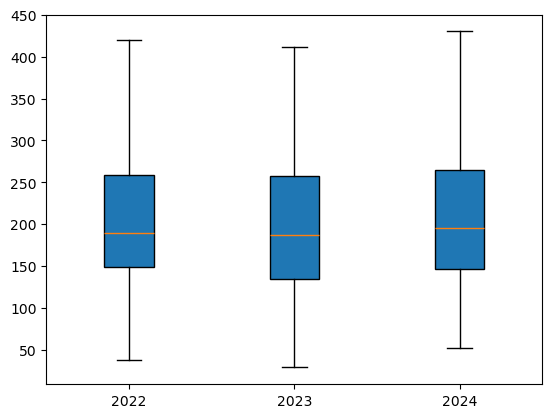

In [10]:
price_2022 = df_japanese.loc[df["年"]==2022,"价格"].to_list()
price_2023 = df_japanese.loc[df["年"]==2023,"价格"].to_list()
price_2024 = df_japanese.loc[df["年"]==2024,"价格"].to_list()
plt.boxplot(
    x=[price_2022,price_2023,price_2024]
    ,labels=["2022","2023","2024"]
    ,patch_artist=True
    ,showfliers=False
    ,
)
plt.show